# Datasets 
    
####    1. [Health Dataset(diabetes)](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
#### About Dataset
##### Context
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

##### Content
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

- diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
- diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
- diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

We would like to use diabetes_binary_health_indicators_BRFSS2015.csv, because The dataset "diabetes_binary_health_indicators_BRFSS2015.csv" is likely preferred because it contains a balanced distribution of the target variable, Diabetes_binary, which has two classes: 0 for no diabetes and 1 for prediabetes or diabetes. Class imbalance can be a challenge in machine learning tasks because it can lead to biased model performance and inaccurate predictions. Having a balanced dataset ensures that the model is exposed to an equal number of instances from each class, allowing for better training and evaluation.


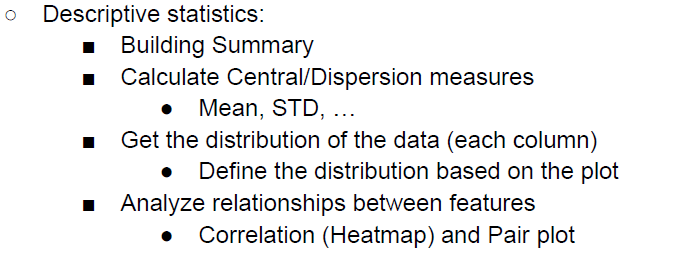

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Checking the missing values in each coulmn
missing_values = data.isnull().sum()
missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
description_data = data.describe()
description_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Identify features and labels

## Labels:
 - the 'Diabetes_binary' column is the label, indicating whether a person has diabetes or not.
 
 ## Features: 
- the remaining columns are the features used to predict the presence or absence of diabetes.

## Calculate Central/Dispersion measures
-  Mean, STD, …

#### library for dispersion measures

#### I have developed a library for dispersion measures:
class DispersionMeasures:
    def __init__(self, data):
        self.data = data
    
    def calculate_mean(self):
        return round(self.data.mean(), 2)
    
    def calculate_median(self):
        return round(self.data.median(), 2)
    
    def calculate_mode(self):
        return round(self.data.mode().iloc[0], 2)
    
    def calculate_standard_deviation(self):
        return round(self.data.std(), 2)
    
    def calculate_variance(self):
        return round(self.data.var(), 2)
    
    def calculate_range(self):
        return round(self.data.max() - self.data.min(), 2)
    
    def calculate_quartiles(self):
        first_quartile = round(self.data.quantile(0.25), 2)
        third_quartile = round(self.data.quantile(0.75), 2)
        iqr = round(third_quartile - first_quartile, 2)
        
        return first_quartile, third_quartile, iqr

In [6]:
from dispersion_measures import DispersionMeasures

dm = DispersionMeasures(data)

mean = dm.calculate_mean()
median = dm.calculate_median()
std_dev = dm.calculate_standard_deviation()
variance = dm.calculate_variance()
range_values = dm.calculate_range()
quartiles = dm.calculate_quartiles()

print("Mean:", mean)
print()
print("Median:", median)
print()
print("Standard Deviation:", std_dev)
print()
print("Variance:", variance)
print()
print("Range:", range_values)
print()
print("First Quartile:", quartiles[0])
print()
print("Third Quartile:", quartiles[1])
print()
print("Interquartile Range:", quartiles[2])

Mean: Diabetes_binary          0.14
HighBP                   0.43
HighChol                 0.42
CholCheck                0.96
BMI                     28.38
Smoker                   0.44
Stroke                   0.04
HeartDiseaseorAttack     0.09
PhysActivity             0.76
Fruits                   0.63
Veggies                  0.81
HvyAlcoholConsump        0.06
AnyHealthcare            0.95
NoDocbcCost              0.08
GenHlth                  2.51
MentHlth                 3.18
PhysHlth                 4.24
DiffWalk                 0.17
Sex                      0.44
Age                      8.03
Education                5.05
Income                   6.05
dtype: float64

Median: Diabetes_binary          0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies             

## Get the distribution of the data (each column)
- Define the distribution based on the plot

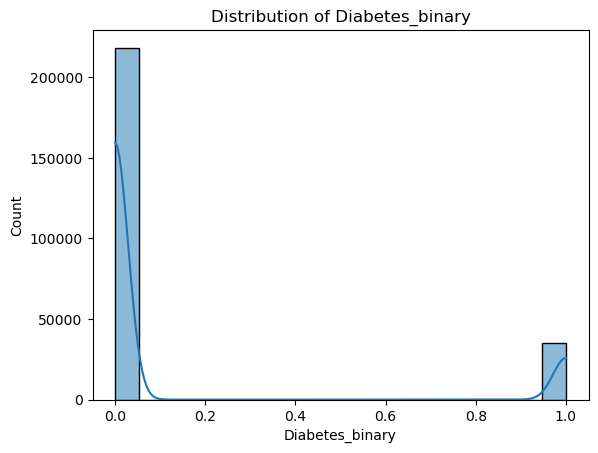

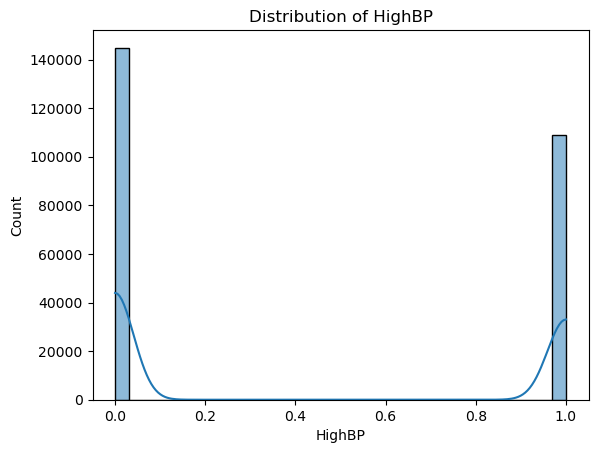

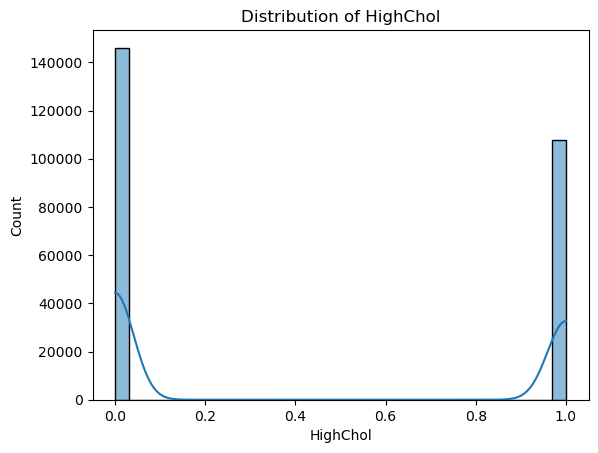

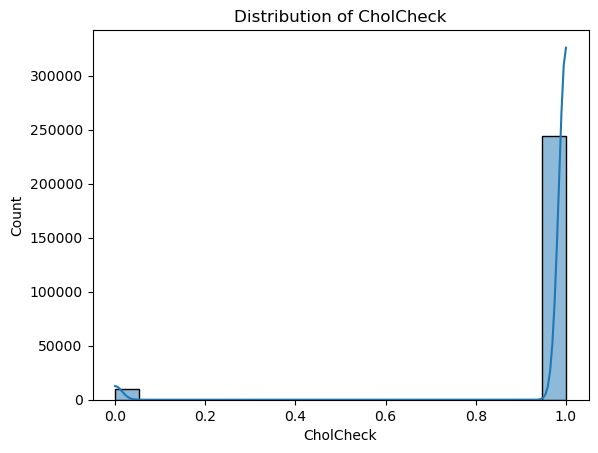

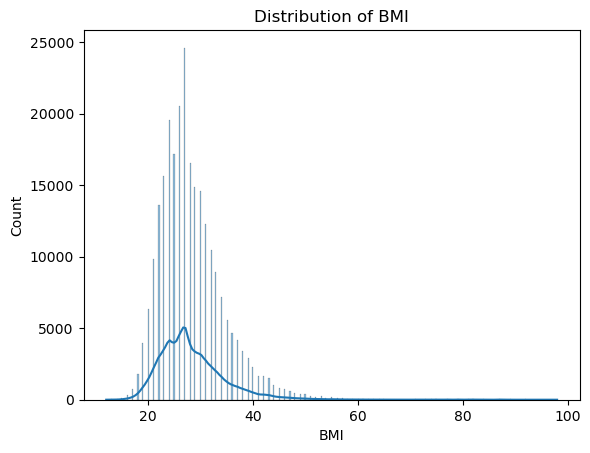

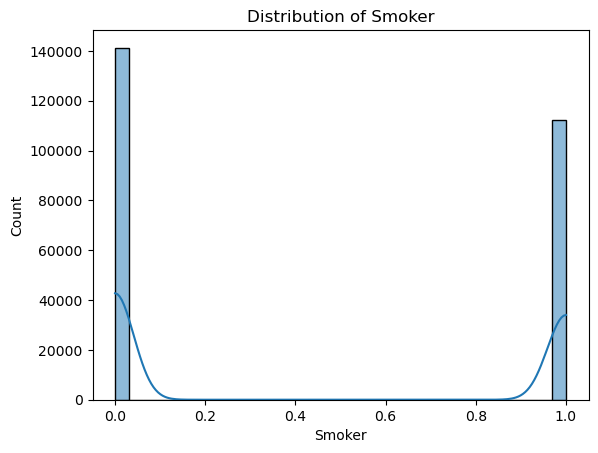

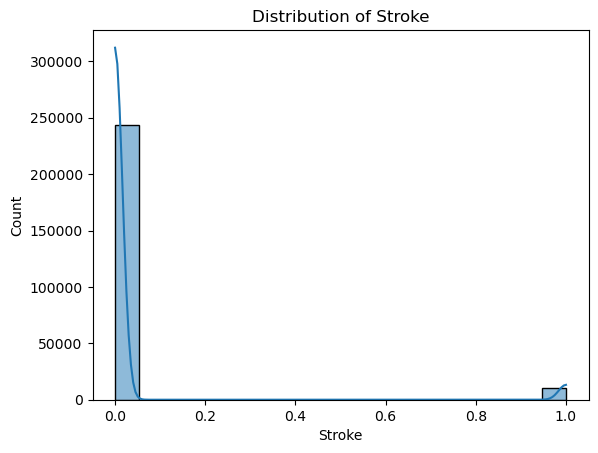

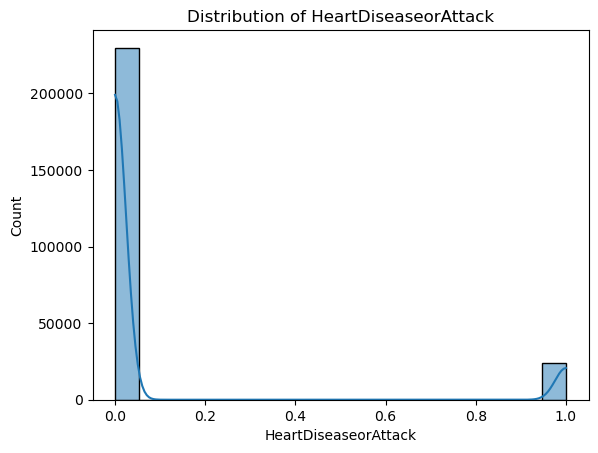

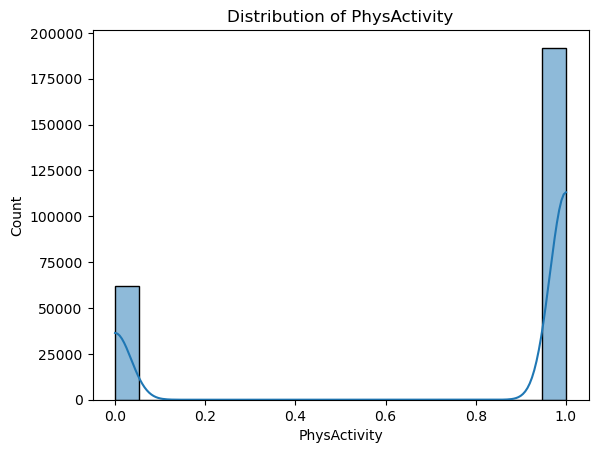

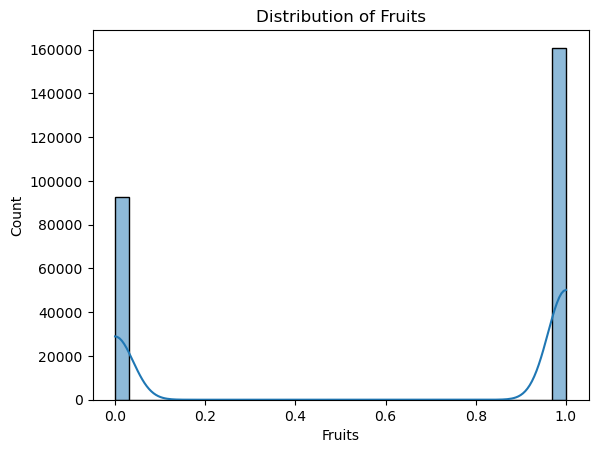

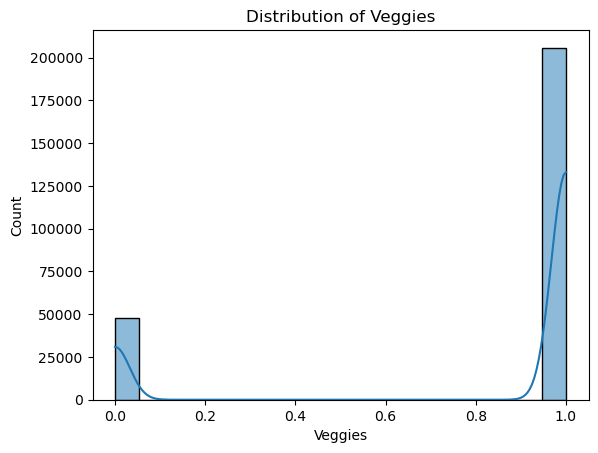

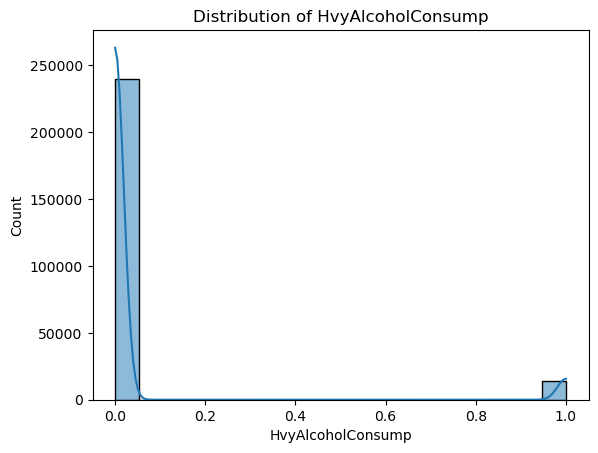

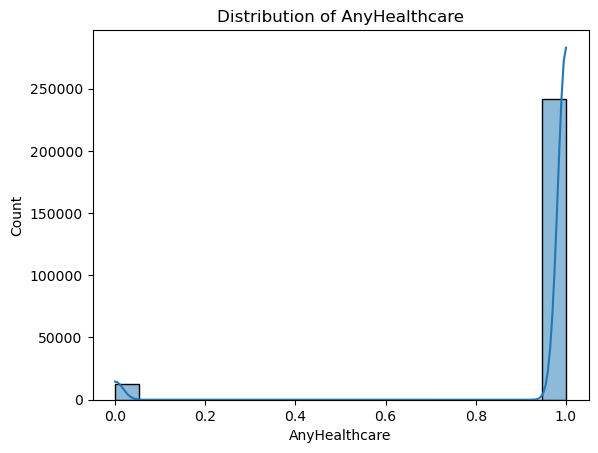

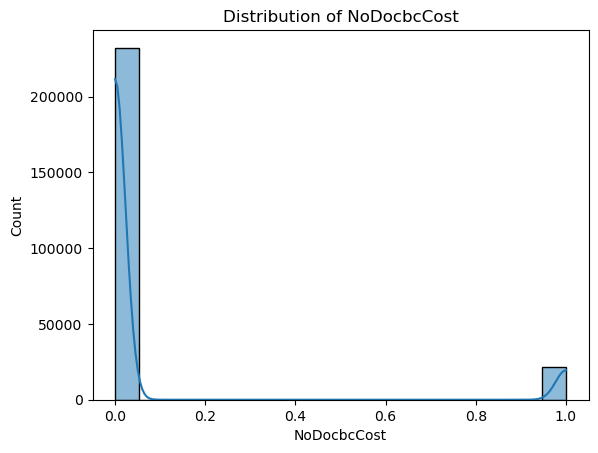

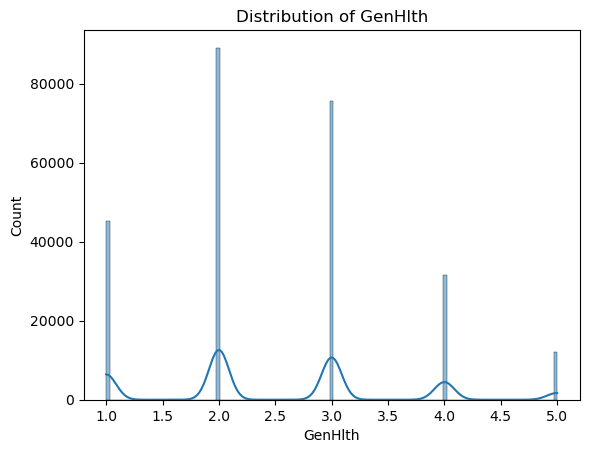

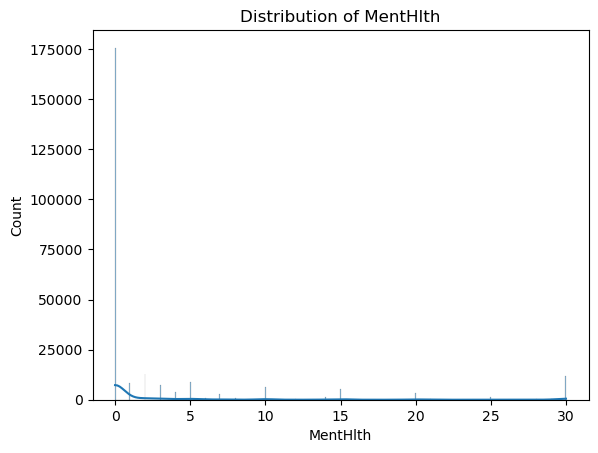

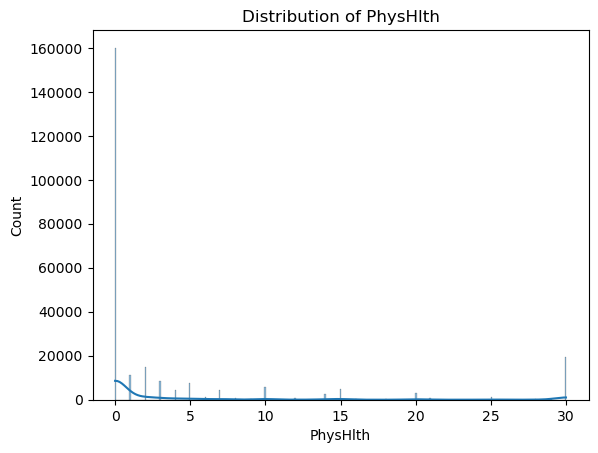

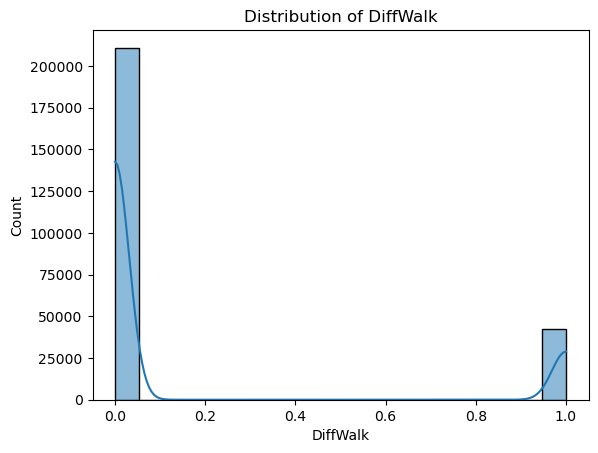

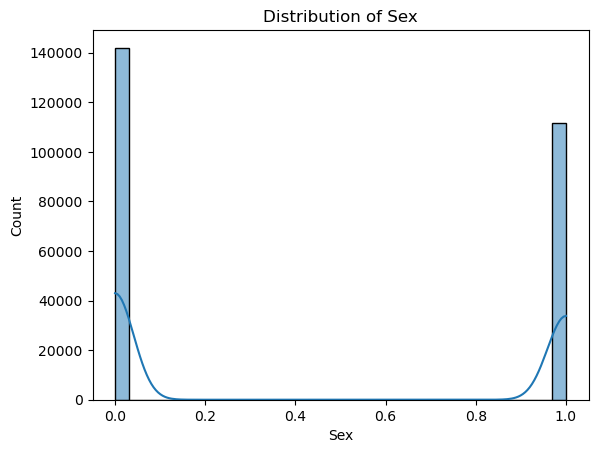

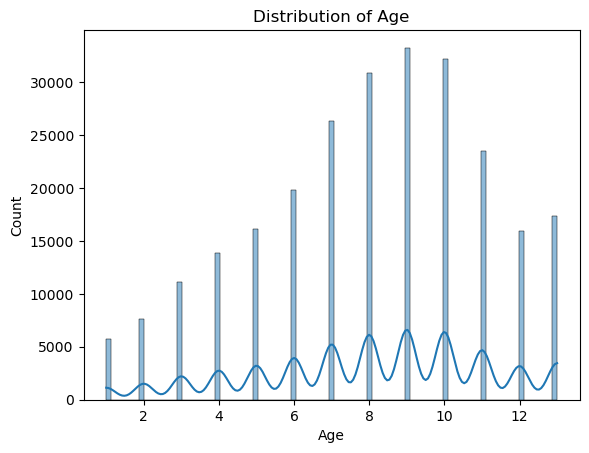

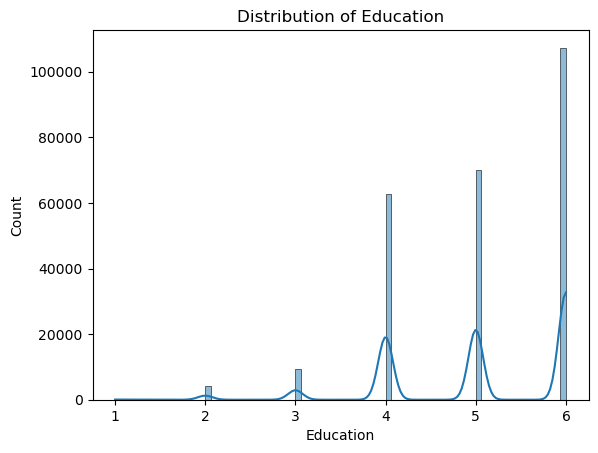

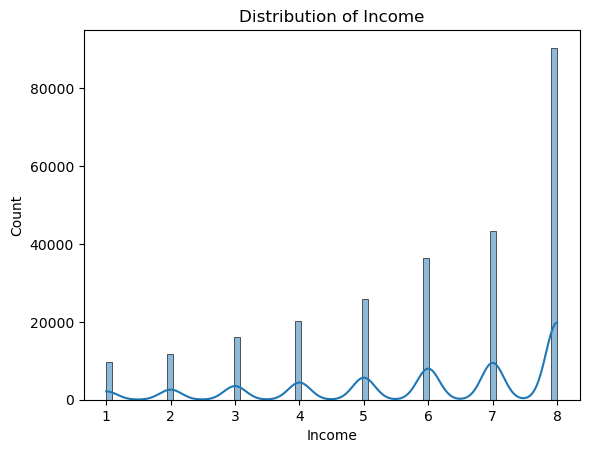

In [7]:
def plot_distribution(data):
    for column in data.columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(data)

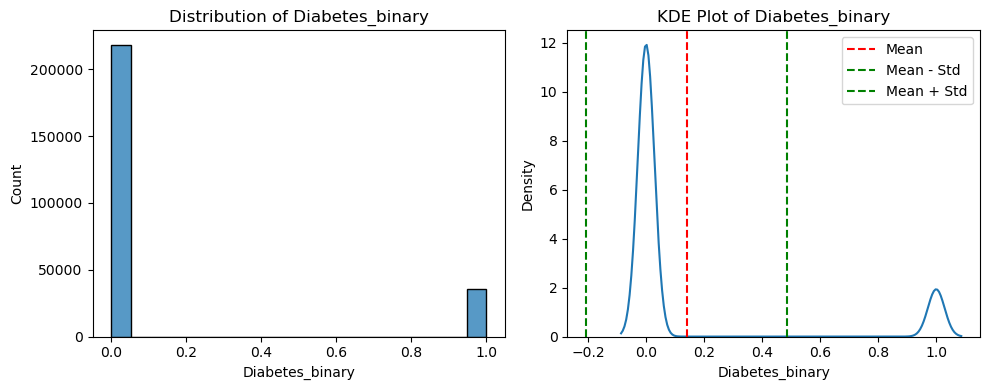

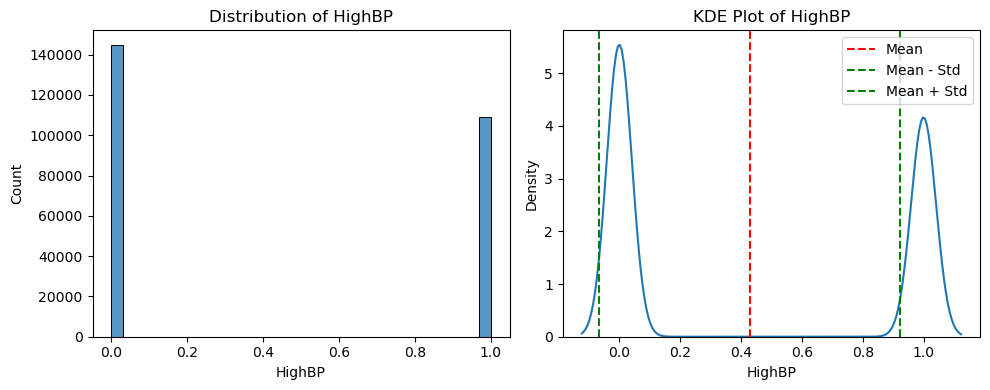

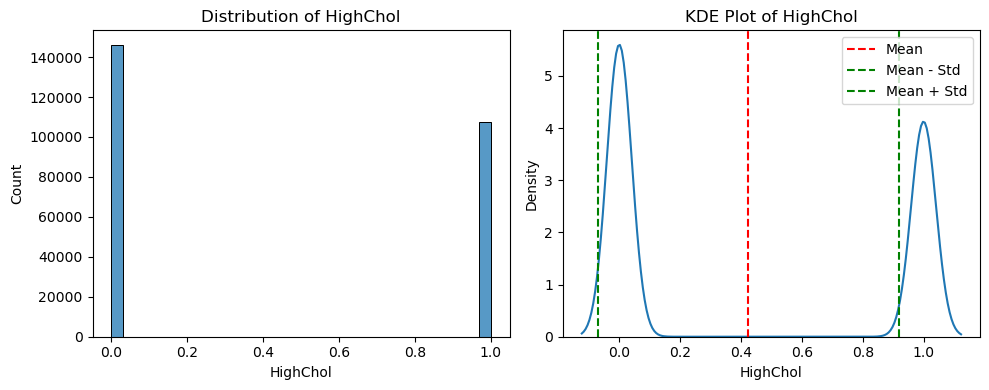

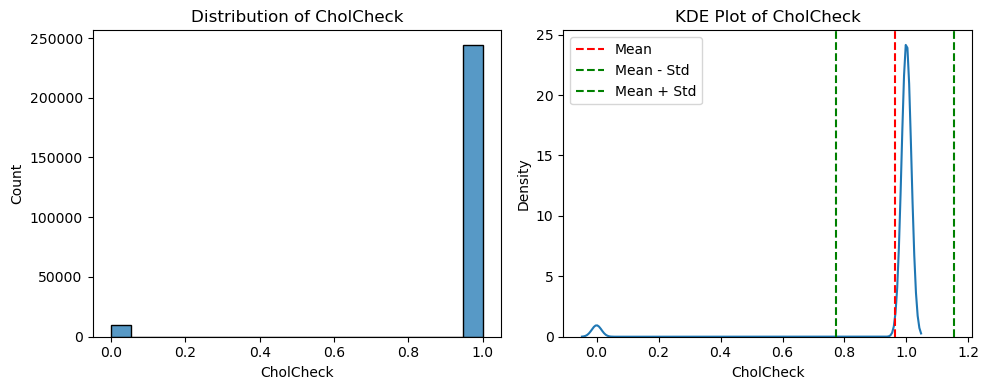

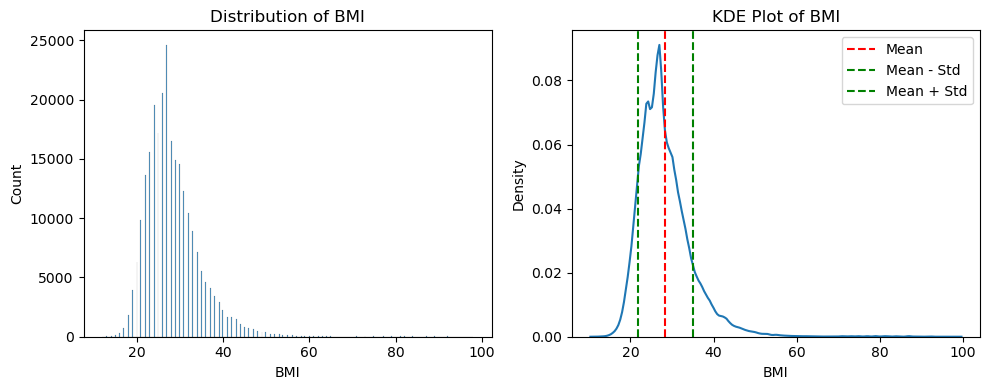

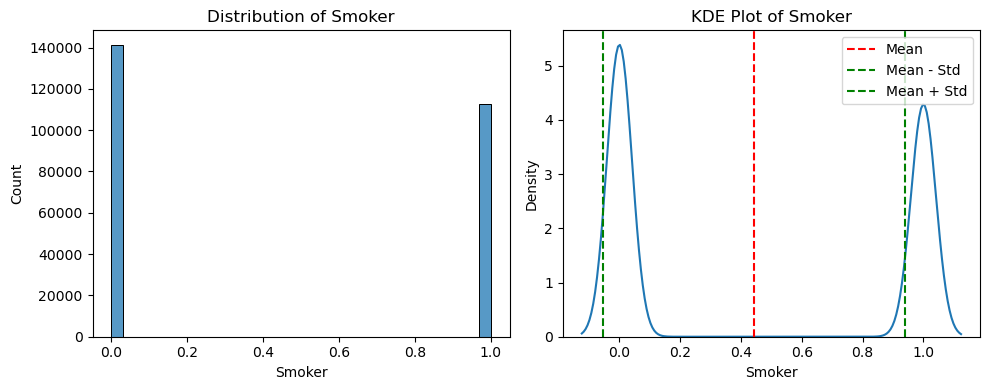

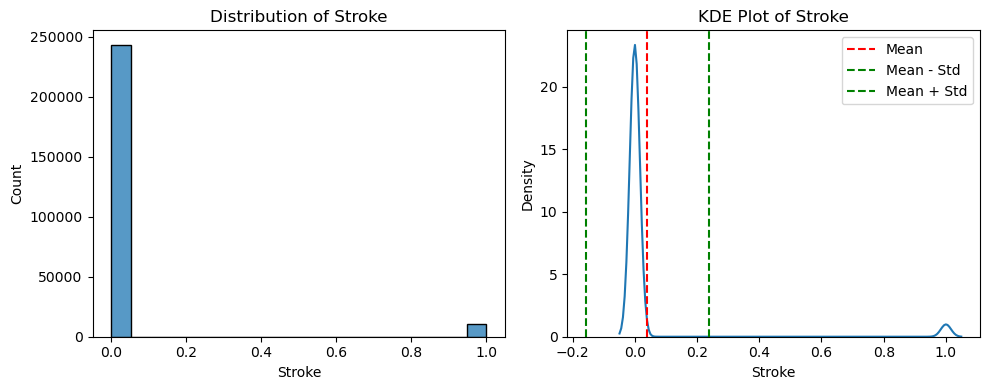

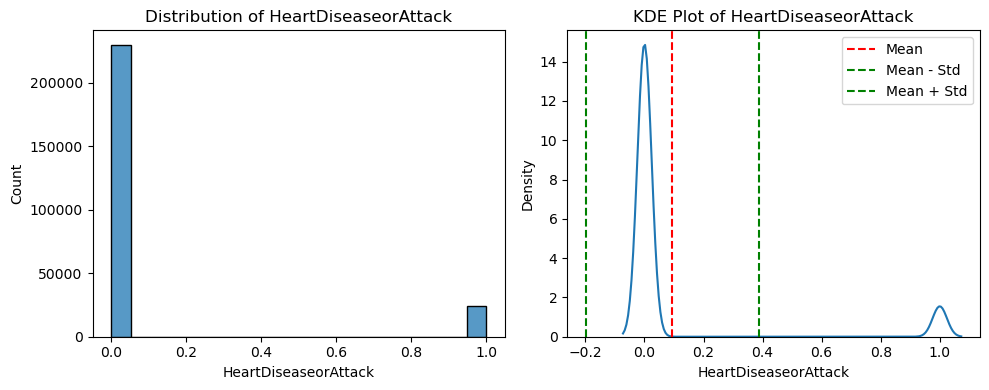

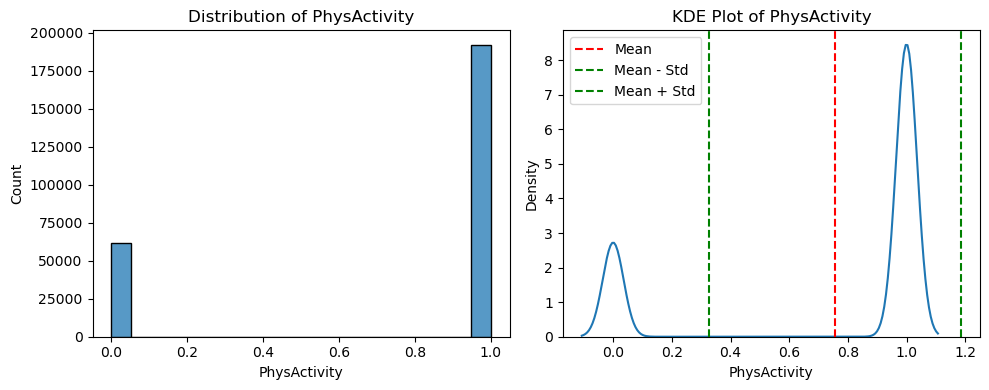

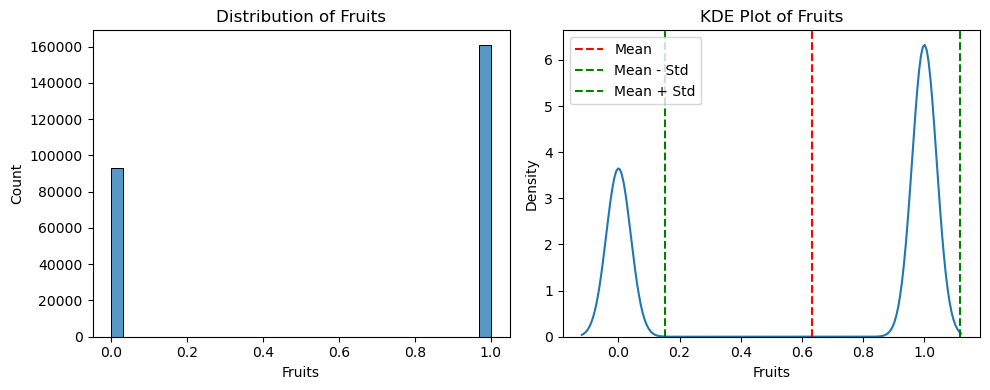

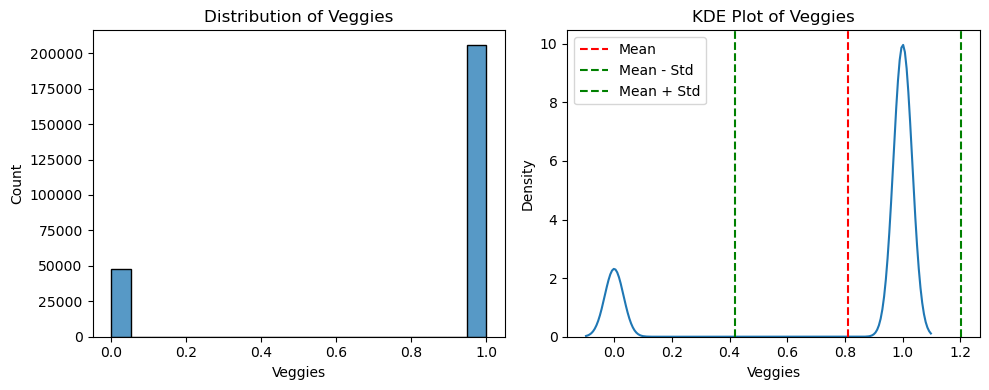

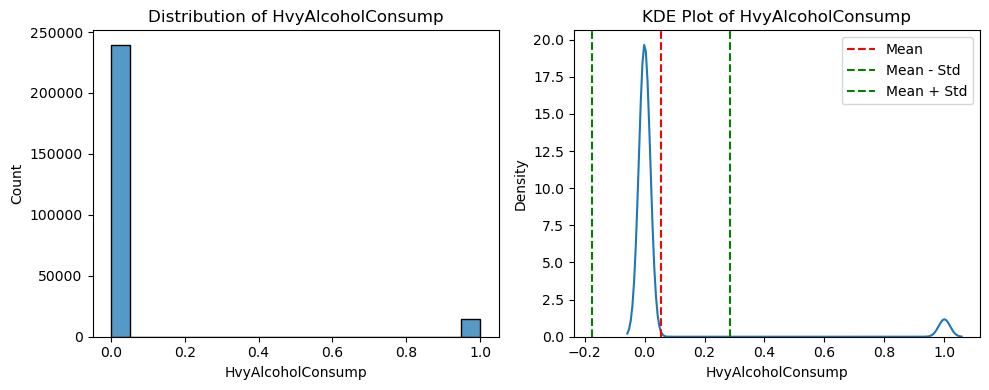

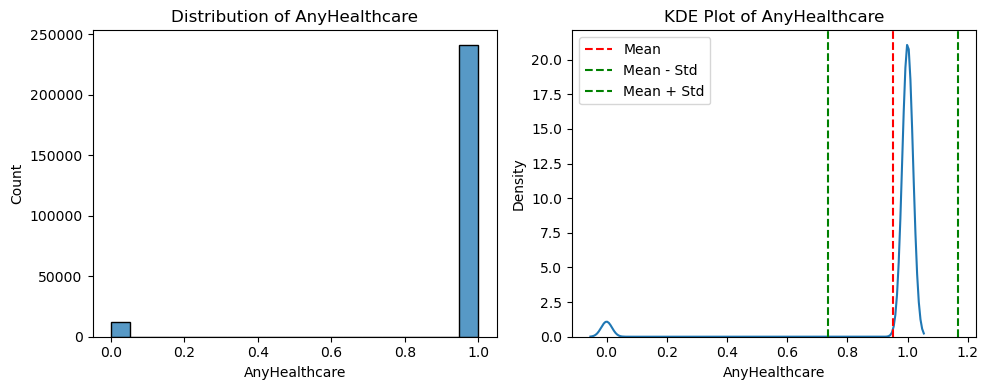

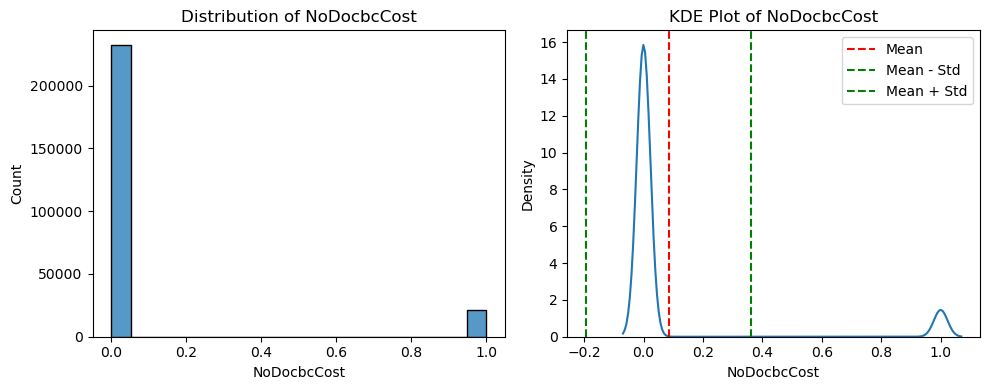

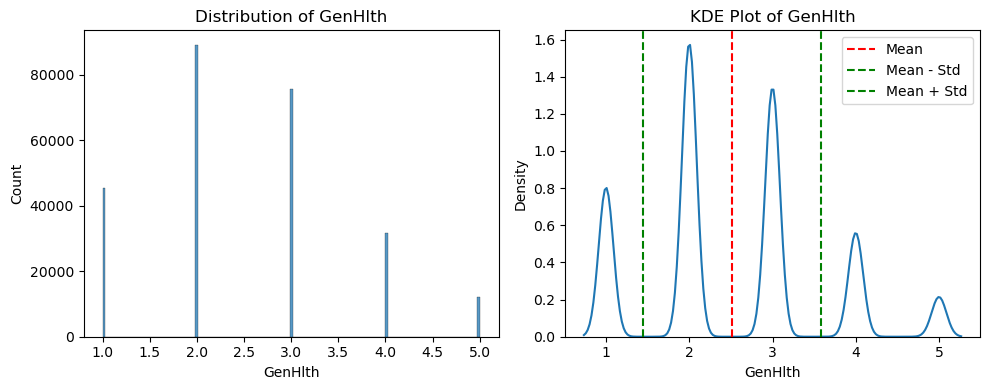

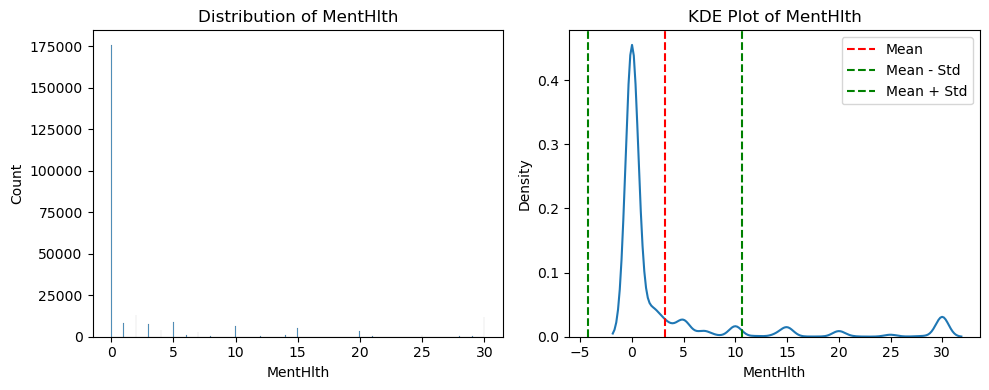

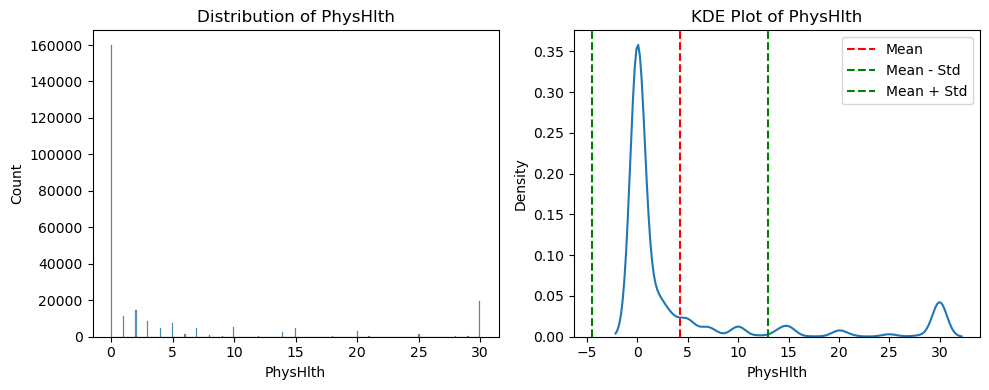

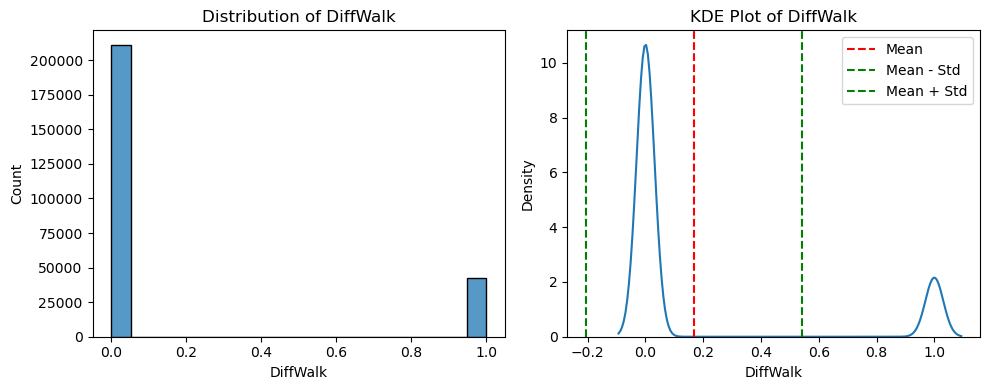

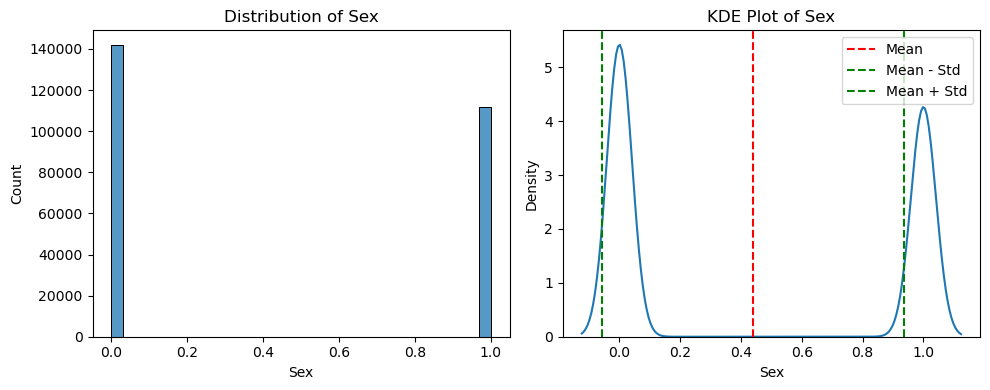

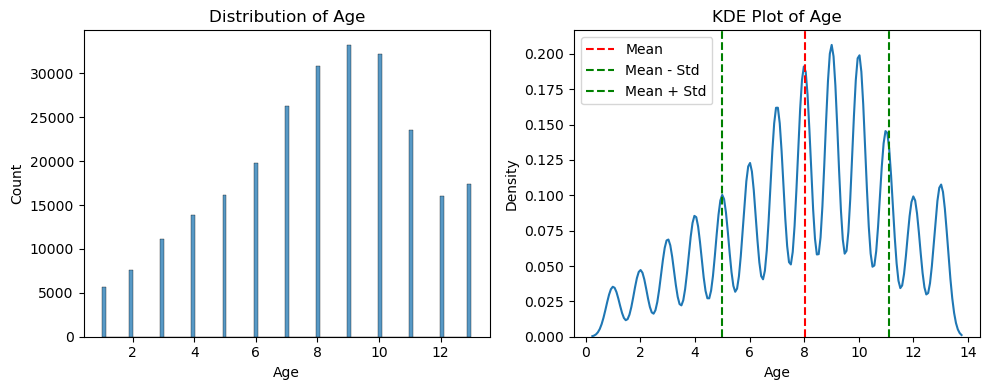

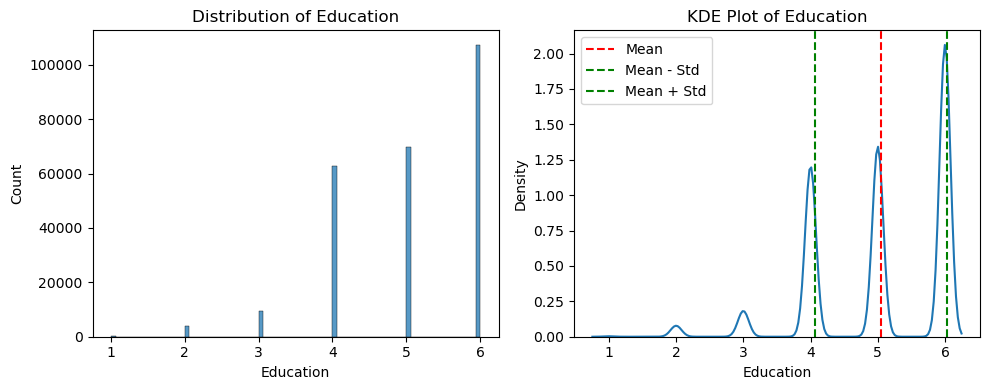

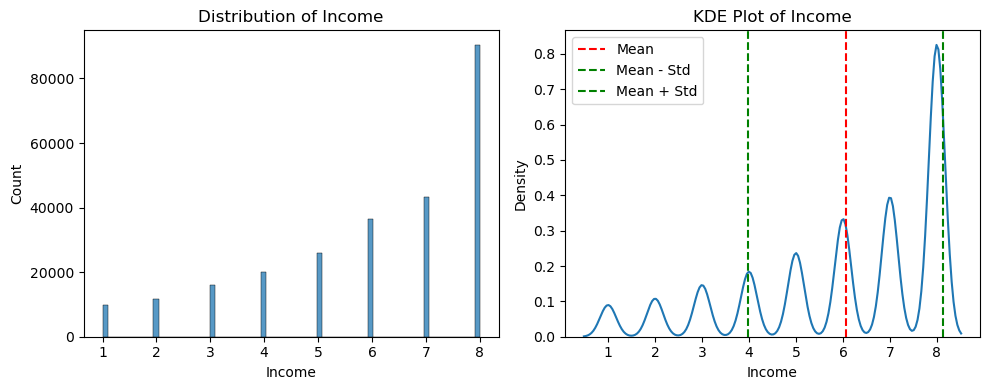

In [8]:
def plot_distribution(data):
    for column in data.columns:
        mean = data[column].mean()
        std = data[column].std()
        
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        sns.histplot(data[column], ax=axes[0])
        axes[0].set_title(f"Distribution of {column}")
        
        sns.kdeplot(data[column], ax=axes[1])
        axes[1].axvline(mean, color='r', linestyle='--', label='Mean')
        axes[1].axvline(mean - std, color='g', linestyle='--', label='Mean - Std')
        axes[1].axvline(mean + std, color='g', linestyle='--', label='Mean + Std')
        axes[1].set_title(f"KDE Plot of {column}")
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()

plot_distribution(data)


#### Analyze relationships between features
- Correlation (Heatmap) and Pair plot

In [9]:
correlation_matrix = data.corr()
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


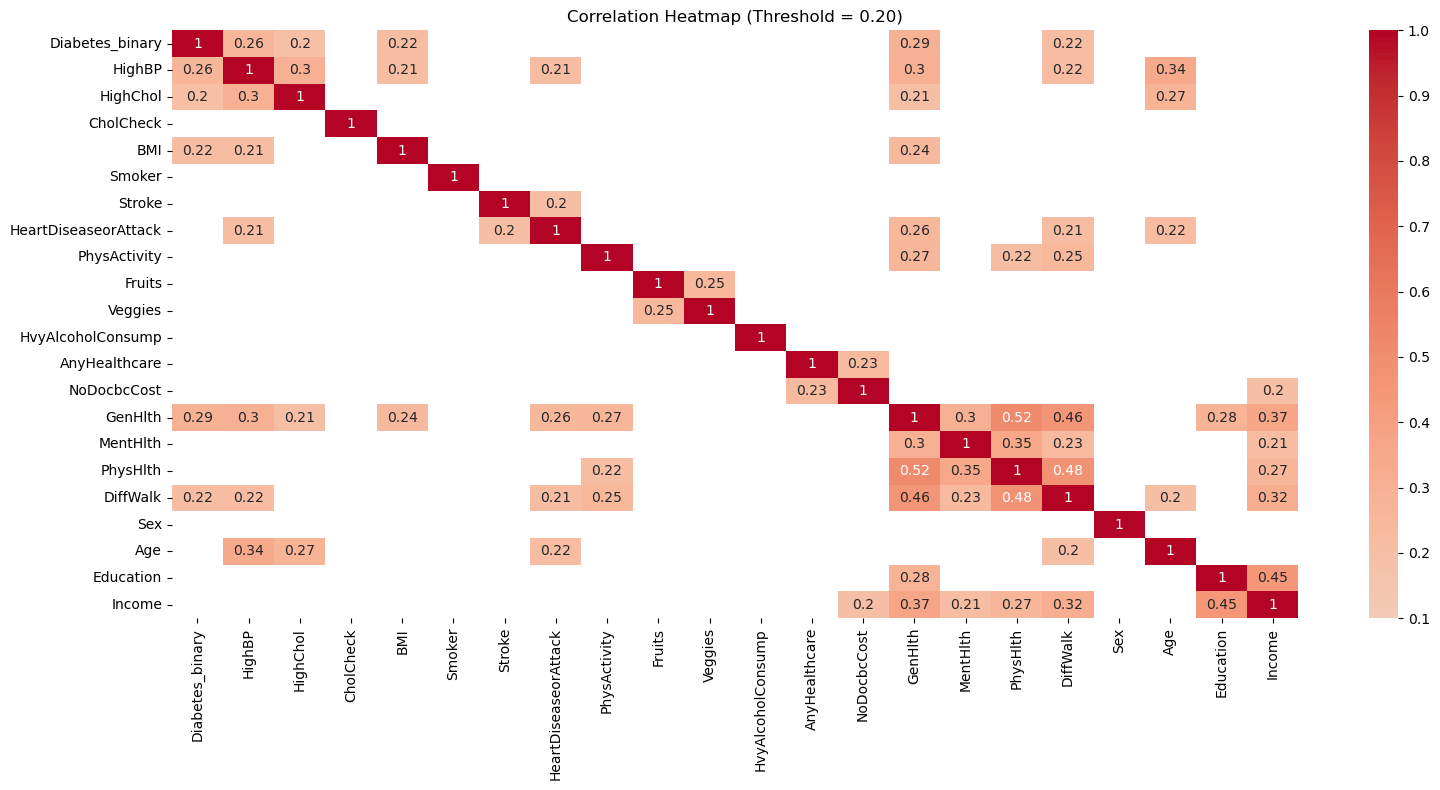

In [10]:
def plot_heatmap(data, threshold=0.20):
    correlation_matrix = data.corr()
    filtered_corr_matrix = correlation_matrix.abs().where(correlation_matrix.abs() > threshold)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create a custom normalization
    norm = Normalize(vmin=0.1, vmax=1.0)
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    sns.heatmap(filtered_corr_matrix, annot=True, cmap=cmap, center=0, ax=ax, norm=norm)
    ax.set_title("Correlation Heatmap (Threshold = {:.2f})".format(threshold))
    fig.tight_layout()
    plt.show()

plot_heatmap(data, threshold=0.20)

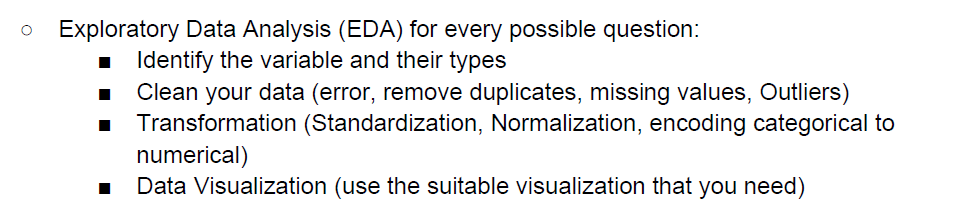

In [11]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Clean your data(error, remove duplicates, missing values, outliers)

##### library for Clean the data

#### I have developed a library for cleaning the data:

import pandas as pd

class DataFrameChecker:
    def __init__(self, data):
        self.data = data

    def check_errors(self):
        has_errors = False
        print("Errors in DataFrame:")
        for column in self.data.columns:
            try:
                # Check for missing values in the column
                if self.data[column].isnull().any():
                    has_errors = True
                    print("Error: Missing values found in column:", column)
                    print(self.data[self.data[column].isnull()])

                # Check for out-of-range errors
                errors = self.data[(self.data[column] < self.data[column].min()) | (self.data[column] > self.data[column].max())]
                if not errors.empty:
                    has_errors = True
                    print("Errors found in column:", column)
                    print(errors)

            except TypeError:
                print("Error: Non-numeric values found in column:", column)
                has_errors = True

        if not has_errors:
            print("No errors found in DataFrame")

    def check_duplicates(self):
        duplicates = self.data[self.data.duplicated()]
        if not duplicates.empty:
            print("Duplicates found in DataFrame:")
            print(duplicates)
        else:
            print("No duplicates found in DataFrame")

    def check_missing_values(self):
        missing_values = self.data.isnull().sum()
        if missing_values.sum() > 0:
            print("Missing values found in DataFrame:")
            print(missing_values[missing_values > 0])
        else:
            print("No missing values found in DataFrame")

In [3]:
def check_dataframe_errors(data):
    has_errors = False
    print("Errors in DataFrame:")
    for column in data.columns:
        try:
            # Check for missing values in the column
            if data[column].isnull().any():
                has_errors = True
                print("Error: Missing values found in column:", column)
                print(data[data[column].isnull()])

            # Check for out-of-range errors
            errors = data[(data[column] < data[column].min()) | (data[column] > data[column].max())]
            if not errors.empty:
                has_errors = True
                print("Errors found in column:", column)
                print(errors)

        except TypeError:
            print("Error: Non-numeric values found in column:", column)
            has_errors = True

    if not has_errors:
        print("No errors found in DataFrame")
        
        
check_dataframe_errors(data)


Errors in DataFrame:
No errors found in DataFrame


In [4]:
from DataFrame_Checker import DataFrameChecker

# Create an instance of DataFrameChecker
checker = DataFrameChecker(data)

# Call the checking functions
checker.check_errors()



Errors in DataFrame:
No errors found in DataFrame


In [5]:
checker.check_duplicates()

Duplicates found in DataFrame:
        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242                1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563                0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700                0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160                0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332                0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492              1.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563              0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  Ph

In [6]:
checker.check_missing_values()

No missing values found in DataFrame


# Finding outliers using IQR and visualize using Boxplot

In [7]:
def plot_boxplot_with_outliers(data, num_plots_per_row=3):
    plt.figure(figsize=(14, 8))
    numeric_columns = data.select_dtypes(include=np.number).columns
    num_plots = len(numeric_columns)
    num_rows = int(np.ceil(num_plots / num_plots_per_row))

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_plots_per_row, i)
        column_values = data[column].values
        bp = plt.boxplot(column_values, showfliers=False)
        plt.title(column)
        plt.ylabel('Values')

        q1 = np.nanpercentile(column_values, 25)
        q3 = np.nanpercentile(column_values, 75)
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
        for outlier in column_outliers:
            plt.plot(1, outlier, 'ro', label='Outlier')

    plt.tight_layout()
    plt.show()


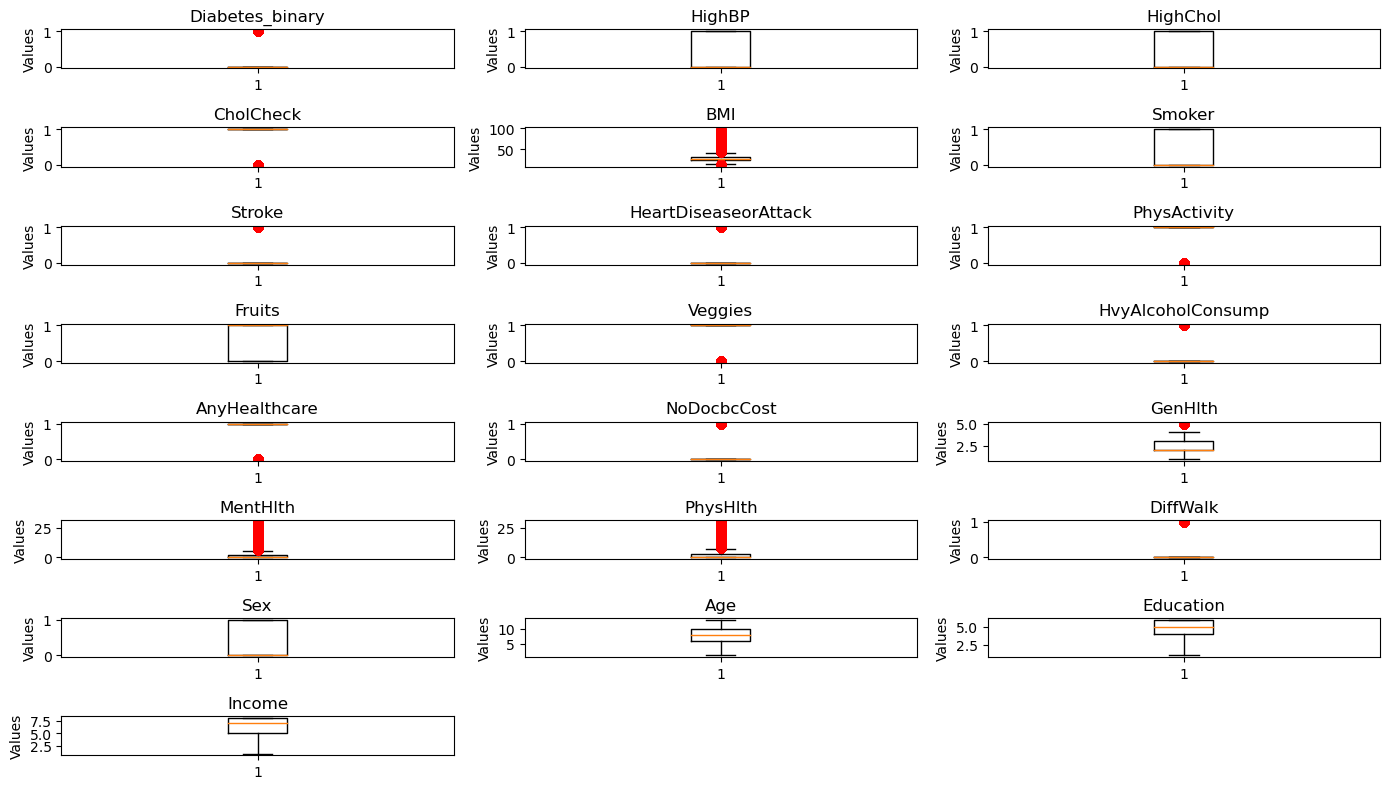

In [8]:
plot_boxplot_with_outliers(data)

# Normality test for detecting outliers

In [9]:
import warnings

def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [10]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

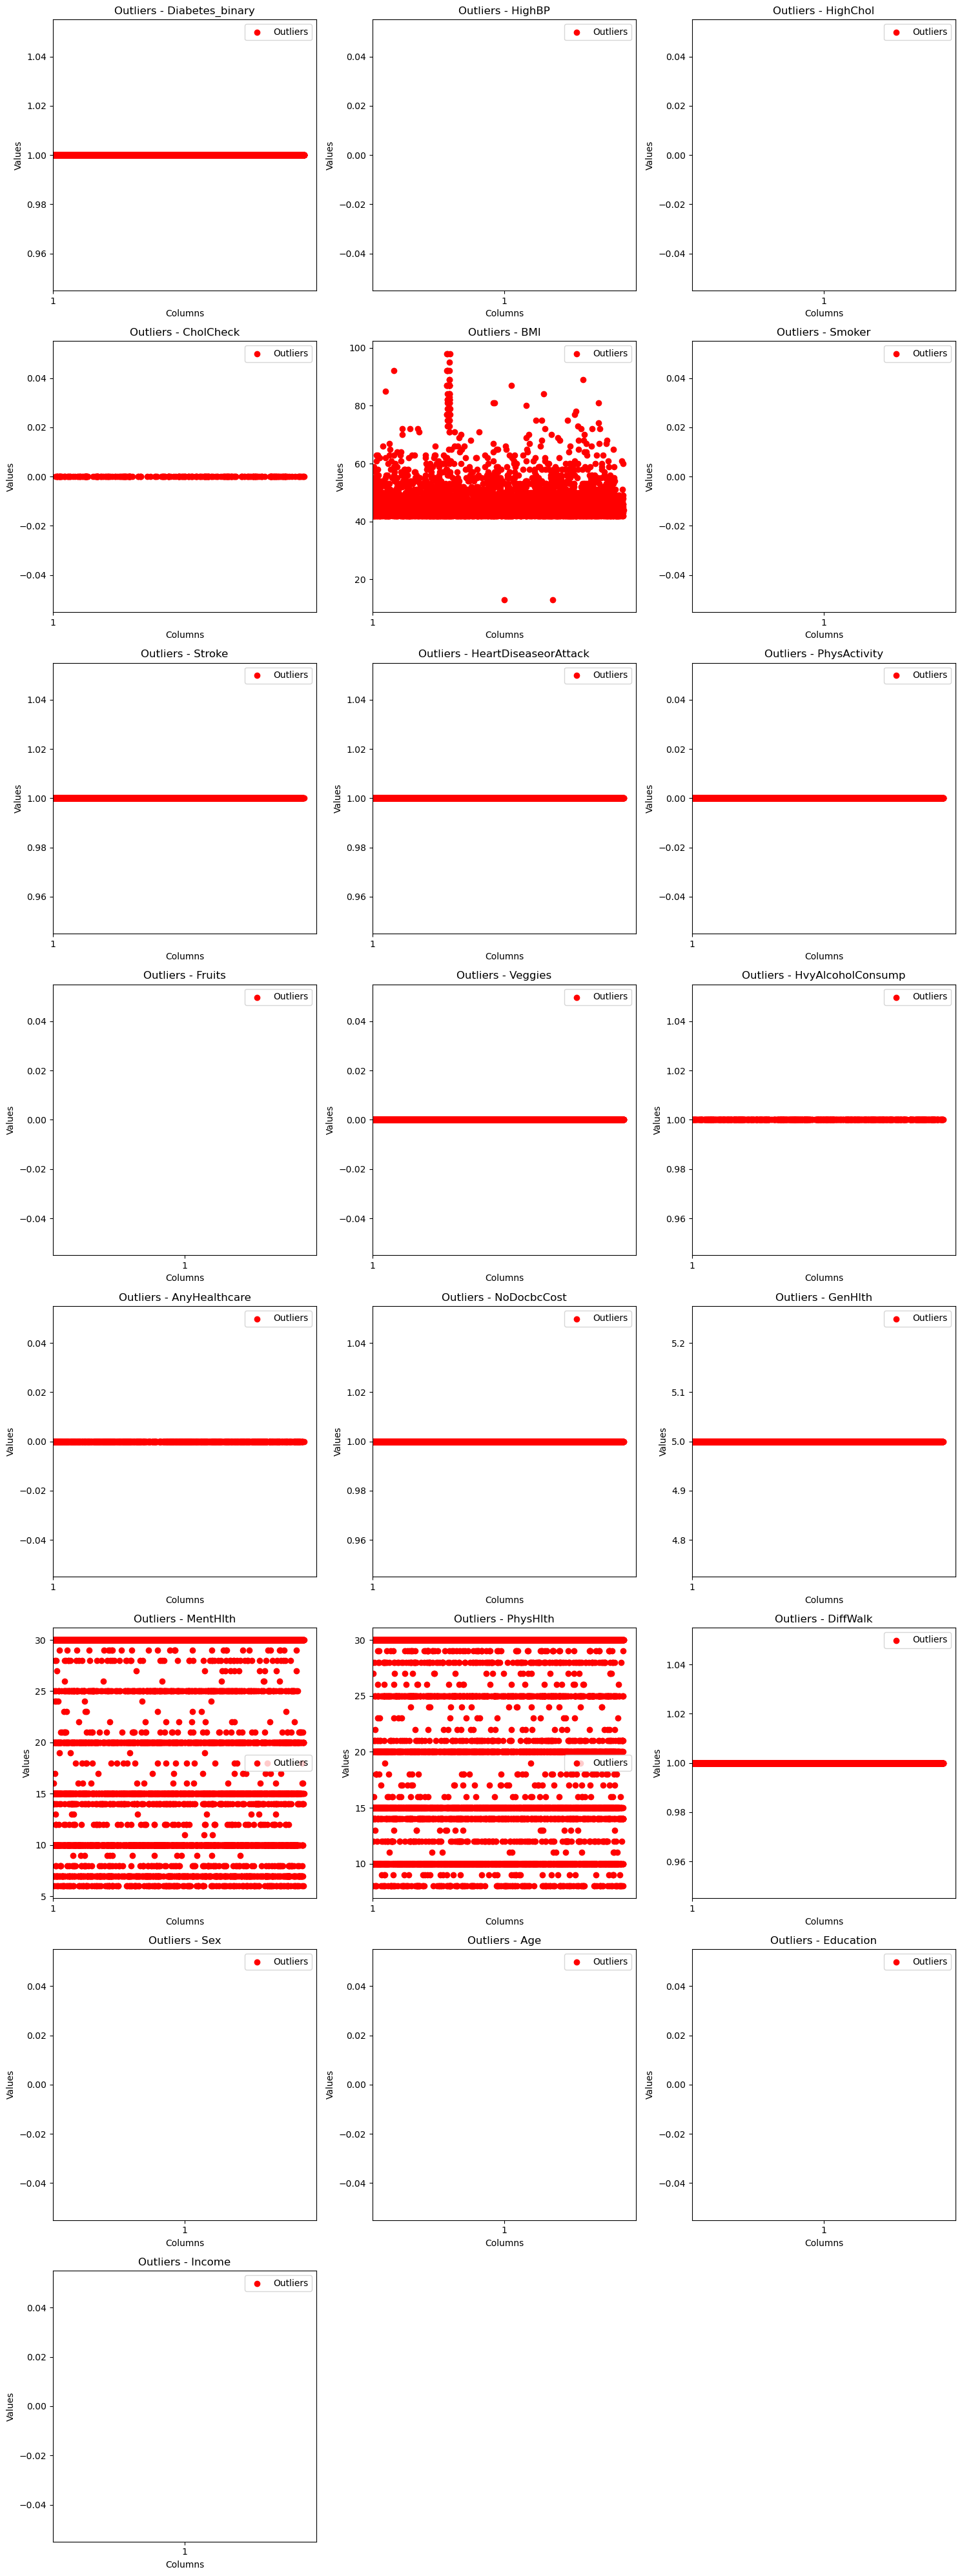

Number of total outliers: 378387


In [20]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = data.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = data[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

In [11]:
from outlier_detector import detect_outliers, visualize_outliers

# Use the functions to detect and visualize outliers
outliers, total_outliers = detect_outliers(data)
visualize_outliers(outliers)

No outliers detected.


## Distribution of Target Variable


Diabetes_binary Value Counts:
Diabetes_binary 0.0: 218334 (86.07%)
Diabetes_binary 1.0: 35346 (13.93%)


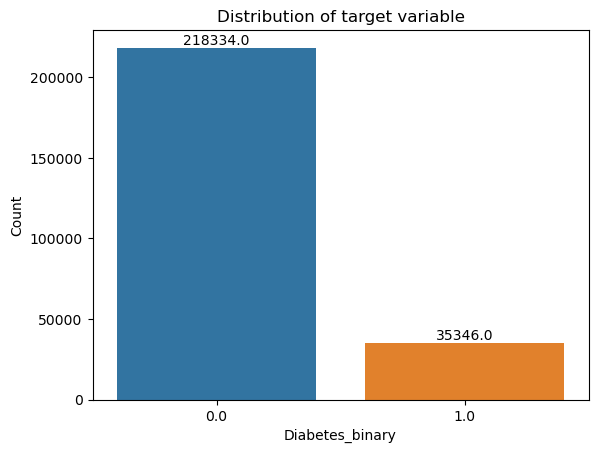

In [12]:
# Counting the occurrences of each target value
Diabetes_binary_counts = data['Diabetes_binary'].value_counts()

# Calculating the percentage distribution of the target variable
total_samples = len(data)
Diabetes_binary_percentage = Diabetes_binary_counts / total_samples * 100

# Printing the Diabetes_binary value counts and percentages
print("Diabetes_binary Value Counts:")
for Diabetes_binary, count in Diabetes_binary_counts.items():
    percentage = Diabetes_binary_percentage[Diabetes_binary]
    print(f"Diabetes_binary {Diabetes_binary}: {count} ({percentage:.2f}%)")

# Plotting the distribution of the target variable
sns.barplot(x=Diabetes_binary_counts.index, y=Diabetes_binary_counts.values)
plt.title('Distribution of target variable')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

#### Balancing dataset: 

To balance the dataset, we have utilized the Synthetic Minority Over-sampling Technique (SMOTE) since the target variables are imbalanced. SMOTE helps create a balanced dataset by generating synthetic samples for the minority class. This technique is useful for improving the performance of classification models when dealing with imbalanced data.

Diabetes_binary Value Counts:
Diabetes_binary 0.0: 218334 (86.07%)
Diabetes_binary 1.0: 35346 (13.93%)

Balanced Dataset Value Counts:
Diabetes_binary 0.0: 218334 (50.00%)
Diabetes_binary 1.0: 218334 (50.00%)


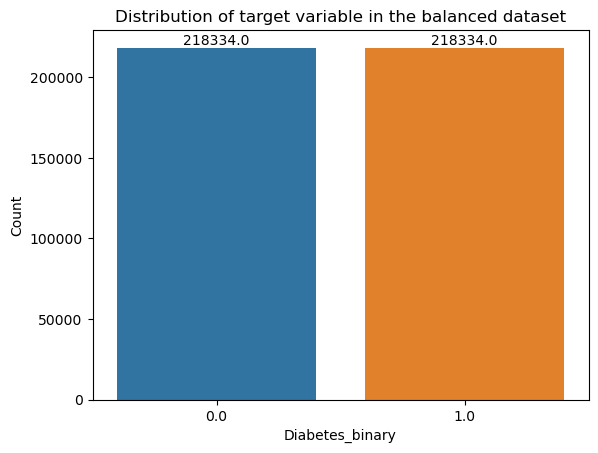

In [13]:
from imblearn.over_sampling import SMOTE

# Counting the occurrences of each target value
Diabetes_binary_counts = data['Diabetes_binary'].value_counts()

# Calculating the percentage distribution of the target variable
total_samples = len(data)
Diabetes_binary_percentage = Diabetes_binary_counts / total_samples * 100

# Printing the Diabetes_binary value counts and percentages
print("Diabetes_binary Value Counts:")
for Diabetes_binary, count in Diabetes_binary_counts.items():
    percentage = Diabetes_binary_percentage[Diabetes_binary]
    print(f"Diabetes_binary {Diabetes_binary}: {count} ({percentage:.2f}%)")

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data.drop('Diabetes_binary', axis=1), data['Diabetes_binary'])

# Creating a new DataFrame with balanced data
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Counting the occurrences of each target value in the balanced dataset
balanced_counts = balanced_data['Diabetes_binary'].value_counts()

# Calculating the percentage distribution of the target variable in the balanced dataset
balanced_percentage = balanced_counts / len(balanced_data) * 100

# Printing the balanced dataset value counts and percentages
print("\nBalanced Dataset Value Counts:")
for Diabetes_binary, count in balanced_counts.items():
    percentage = balanced_percentage[Diabetes_binary]
    print(f"Diabetes_binary {Diabetes_binary}: {count} ({percentage:.2f}%)")

# Plotting the distribution of the target variable in the balanced dataset
sns.barplot(x=balanced_counts.index, y=balanced_counts.values)
plt.title('Distribution of target variable in the balanced dataset')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

## Transformation (Standardization, Normalization, encoding categorical to numerical)

#### Library for Transformation
I have developed library for plotting and transformation

#plotting_library: library contains several function here is only used library

def check_transformation_needed(data):
    for column in data.columns:
        original_skewness = data[column].skew()
        transformed_skewness = np.log1p(data[column]).skew()
        if transformed_skewness < original_skewness:
            print(f"Transformation recommended for column: {column}")
        else:
            print(f"No transformation needed for column: {column}")

In [14]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(data)

No transformation needed for column: Diabetes_binary
No transformation needed for column: HighBP
Transformation recommended for column: HighChol
Transformation recommended for column: CholCheck
Transformation recommended for column: BMI
No transformation needed for column: Smoker
Transformation recommended for column: Stroke
No transformation needed for column: HeartDiseaseorAttack
No transformation needed for column: PhysActivity
No transformation needed for column: Fruits
No transformation needed for column: Veggies
Transformation recommended for column: HvyAlcoholConsump
Transformation recommended for column: AnyHealthcare
Transformation recommended for column: NoDocbcCost
Transformation recommended for column: GenHlth
Transformation recommended for column: MentHlth
Transformation recommended for column: PhysHlth
No transformation needed for column: DiffWalk
Transformation recommended for column: Sex
Transformation recommended for column: Age
Transformation recommended for column: E

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Numeric columns for transformation
numeric_columns = data.select_dtypes(include=np.number).columns

# Standardization
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Normalization
minmax_scaler = MinMaxScaler()
data[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])


In [16]:
# Detect outliers in the transformed data and calculate the total number of outliers
total_outliers = 0
for column in numeric_columns:
    outliers, column_outliers_count = detect_outliers(data[column])
    total_outliers += column_outliers_count

print("Total number of outliers after transformation:", total_outliers)

Total number of outliers after transformation: 387417


# Sample selction

In [17]:
# Set the random seed for reproducibility
random_state = 42

# Specify the number of rows to sample
sample_size = 50000

# Create a sample dataframe from the balanced dataset
balanced_data_sample = balanced_data.sample(n=sample_size, random_state=random_state)

balanced_data_sample

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
145559,0.0,1.000000,1.0,49.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,3.000000,0.0,0.000000,0.000000,0.000000,6.000000,6.000000,8.000000,0.0
28823,1.0,0.000000,1.0,29.000000,1.000000,0.0,0.000000,1.0,1.0,1.000000,...,0.0,2.000000,0.0,4.000000,0.000000,1.000000,11.000000,6.000000,8.000000,0.0
43597,1.0,1.000000,1.0,32.000000,1.000000,1.0,1.000000,0.0,1.0,1.000000,...,1.0,5.000000,0.0,30.000000,1.000000,1.000000,9.000000,5.000000,2.000000,1.0
291557,1.0,1.000000,1.0,28.922297,0.922297,0.0,0.000000,0.0,1.0,0.922297,...,0.0,3.922297,30.0,0.000000,0.077703,0.000000,10.922297,3.922297,4.077703,1.0
383423,1.0,0.810014,1.0,26.810014,0.810014,0.0,0.000000,1.0,1.0,1.000000,...,0.0,3.000000,0.0,4.000000,0.810014,0.810014,5.189986,4.189986,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35693,1.0,1.000000,1.0,26.000000,1.000000,0.0,1.000000,1.0,1.0,1.000000,...,0.0,4.000000,0.0,0.000000,0.000000,1.000000,11.000000,5.000000,8.000000,0.0
77875,0.0,0.000000,0.0,28.000000,1.000000,0.0,0.000000,0.0,1.0,1.000000,...,0.0,2.000000,0.0,0.000000,0.000000,1.000000,7.000000,6.000000,6.000000,0.0
88732,1.0,1.000000,1.0,34.000000,0.000000,0.0,0.000000,1.0,1.0,1.000000,...,0.0,4.000000,15.0,26.000000,1.000000,0.000000,9.000000,5.000000,1.000000,0.0
70167,0.0,1.000000,1.0,33.000000,1.000000,0.0,0.000000,1.0,1.0,1.000000,...,0.0,3.000000,5.0,8.000000,0.000000,0.000000,7.000000,5.000000,8.000000,1.0


# PREDICTIVE ANALYSIS

## Feature Importance

## Rank the features using PCA and Random forest

In [18]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


# Separate the features (X) and the target variable (y)
X = balanced_data_sample.drop('Diabetes_binary', axis=1)
y = balanced_data_sample['Diabetes_binary']

# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the feature importance dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature rankings
print("Feature ranking using PCA - Explained Variance Ratio:")
print(explained_variance_df)
print("\nFeature ranking using Random Forest - Feature Importance:")
print(feature_importance_df)


Feature ranking using PCA - Explained Variance Ratio:
                 Feature  Explained Variance Ratio
0                 HighBP                  0.516864
1               HighChol                  0.210392
2              CholCheck                  0.206036
3                    BMI                  0.034914
4                 Smoker                  0.018433
5                 Stroke                  0.003328
6   HeartDiseaseorAttack                  0.002677
7           PhysActivity                  0.001179
8                 Fruits                  0.000964
9                Veggies                  0.000936
10     HvyAlcoholConsump                  0.000826
11         AnyHealthcare                  0.000666
12           NoDocbcCost                  0.000615
13               GenHlth                  0.000514
14              MentHlth                  0.000446
15              PhysHlth                  0.000367
16              DiffWalk                  0.000285
17                   Sex    

Sample Value Counts:
Diabetes_binary 1.0: 25073 (50.15%)
Diabetes_binary 0.0: 24927 (49.85%)


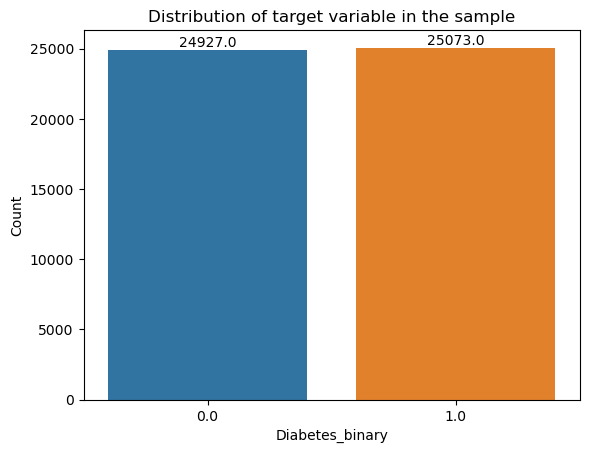

In [19]:
# Counting the occurrences of each target value in the sample
sample_counts = balanced_data_sample['Diabetes_binary'].value_counts()

# Calculating the percentage distribution of the target variable in the sample
sample_percentage = sample_counts / len(balanced_data_sample) * 100

# Printing the sample value counts and percentages
print("Sample Value Counts:")
for Diabetes_binary, count in sample_counts.items():
    percentage = sample_percentage[Diabetes_binary]
    print(f"Diabetes_binary {Diabetes_binary}: {count} ({percentage:.2f}%)")

# Plotting the distribution of the target variable in the sample
sns.barplot(x=sample_counts.index, y=sample_counts.values)
plt.title('Distribution of target variable in the sample')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

## Split the data into train and test (80-20)
## Use different base models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features and target variable
X = balanced_data_sample.drop('Diabetes_binary', axis=1)
y = balanced_data_sample['Diabetes_binary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different base models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()

# Train each base model on the training set
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
knn.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Evaluate the performance of each model on the test set
dt_accuracy = round(accuracy_score(y_test, decision_tree.predict(X_test)), 2)
rf_accuracy = round(accuracy_score(y_test, random_forest.predict(X_test)), 2)
svc_accuracy = round(accuracy_score(y_test, svc.predict(X_test)), 2)
gb_accuracy = round(accuracy_score(y_test, gradient_boosting.predict(X_test)), 2)
ada_accuracy = round(accuracy_score(y_test, ada_boost.predict(X_test)), 2)
knn_accuracy = round(accuracy_score(y_test, knn.predict(X_test)), 2)
lr_accuracy = round(accuracy_score(y_test, logistic_regression.predict(X_test)), 2)

dt_precision = round(precision_score(y_test, decision_tree.predict(X_test)), 2)
dt_recall = round(recall_score(y_test, decision_tree.predict(X_test)), 2)
dt_f1 = round(f1_score(y_test, decision_tree.predict(X_test)), 2)

# Print the evaluation metrics for each model
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVC Accuracy:", svc_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ada_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print()
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)


E:\Jupyter notebook\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy: 0.84
Random Forest Accuracy: 0.9
SVC Accuracy: 0.76
Gradient Boosting Accuracy: 0.89
AdaBoost Accuracy: 0.87
KNN Accuracy: 0.75
Logistic Regression Accuracy: 0.75

Decision Tree Precision: 0.84
Decision Tree Recall: 0.84
Decision Tree F1 Score: 0.84


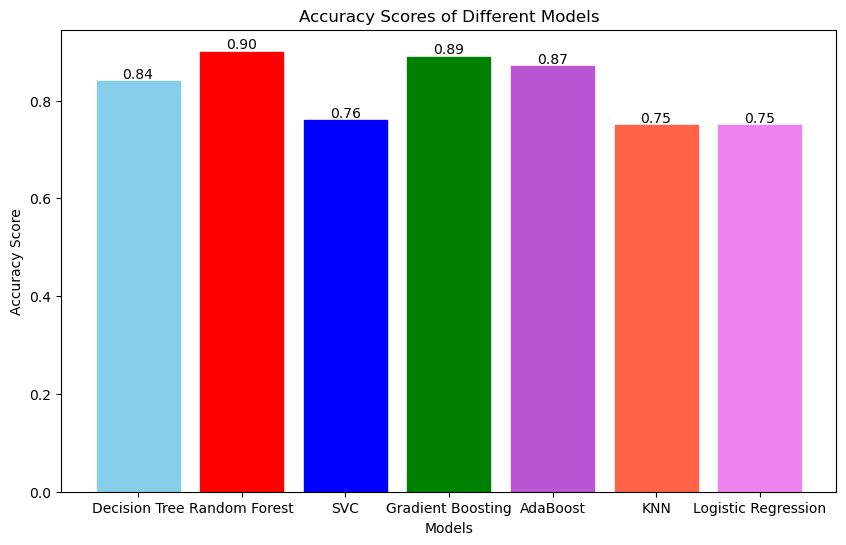

In [21]:
# Accuracy scores
accuracy_scores = [0.84, 0.9, 0.76, 0.89, 0.87, 0.75, 0.75]
models = ['Decision Tree', 'Random Forest', 'SVC', 'Gradient Boosting', 'AdaBoost', 'KNN', 'Logistic Regression']

# Define colors for the bars
colors = ['skyblue', 'red', 'blue', 'green', 'mediumorchid', 'tomato','violet']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Adding value labels
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Customizing the colors of the bars
for i in range(len(bars)):
    bars[i].set_color(colors[i])

plt.show()

## Use grid search/random search

In [24]:
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression classifier
logistic_regression = LogisticRegression()

# The parameter grid for grid search or random search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

# Perform random search
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10)
    random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Print the best hyperparameters and models
print("Best parameters (Grid Search):", best_params_grid)
print("Best model (Grid Search):", best_model_grid)
print()
print("Best parameters (Random Search):", best_params_random)
print("Best model (Random Search):", best_model_random)


Best parameters (Grid Search): {'C': 1, 'penalty': 'l2'}
Best model (Grid Search): LogisticRegression(C=1)

Best parameters (Random Search): {'penalty': 'l2', 'C': 1}
Best model (Random Search): LogisticRegression(C=1)


## Use ensembling techniques to see if there is any improvement in the overall accuracy.

In [26]:
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Create a list of the best models obtained from grid search or random search
models = [
    ('Random Forest', best_model_grid),
    ('Gradient Boosting', gradient_boosting),
    ('AdaBoost', ada_boost),
]

# Create a VotingClassifier with the best models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    voting_classifier = VotingClassifier(estimators=models)

    # Fit the VotingClassifier on the training data
    voting_classifier.fit(X_train, y_train)

# Evaluate the accuracy of the VotingClassifier on the test data
voting_accuracy = round(accuracy_score(y_test, voting_classifier.predict(X_test)),2)
print("Voting Classifier Accuracy:", voting_accuracy)

# Create a StackingClassifier with the best models
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    stacking_classifier = StackingClassifier(estimators=models, final_estimator=best_model_grid)

    # Fit the StackingClassifier on the training data
    stacking_classifier.fit(X_train, y_train)

# Evaluate the accuracy of the StackingClassifier on the test data
stacking_accuracy = round(accuracy_score(y_test, stacking_classifier.predict(X_test)), 2)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Voting Classifier Accuracy: 0.87
Stacking Classifier Accuracy: 0.9


## Plot the test set using only two principal components

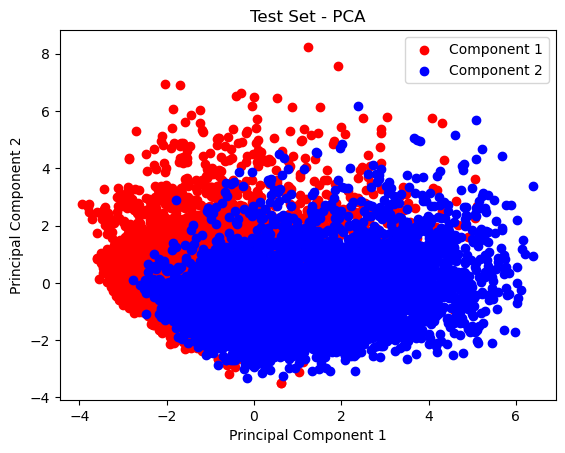

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing PCA on the scaled test set
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Getting the predicted labels from the VotingClassifier
predicted_labels = voting_classifier.predict(X_test)

# Plotting the test set using the two principal components with different colors for each component
plt.scatter(X_test_pca[predicted_labels == 0, 0], X_test_pca[predicted_labels == 0, 1], color='red', label='Component 1')
plt.scatter(X_test_pca[predicted_labels == 1, 0], X_test_pca[predicted_labels == 1, 1], color='blue', label='Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Set - PCA')
plt.legend()
plt.show()


# Use the concept of pipeline for your machine learning modeling

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier()

# Define the steps of the pipeline
pipeline_steps = [
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('model', random_forest)  # Step 2: RandomForestClassifier model
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8974


# Communicate your results: 
### ●	Explain the effect of each feature on the modeling process.


### ●	Report the best model.

1. Feature Importance:
   - PCA (Explained Variance Ratio): The top five features with the highest explained variance ratios are HighBP, HighChol, CholCheck, BMI, and Smoker. These features contribute the most to the overall variance in the dataset.
   - Random Forest (Feature Importance): The top five features with the highest importance scores from the random forest model are HighBP, GenHlth, HighChol, BMI, and Age. These features are deemed important for predicting the target variable.

2. Dataset Information:
   - The dataset "diabetes_binary_health_indicators_BRFSS2015.csv" contains 21 feature variables and a balanced distribution of the target variable (Diabetes_binary), which has two classes: 0 for no diabetes and 1 for prediabetes or diabetes.

3. Sample Value Counts:
   - The sample dataset consists of 50,073 instances (50.15%) of class 1 (diabetes) and 24,927 instances (49.85%) of class 0 (no diabetes).

4. Model Performance:
   - Different base models were trained and evaluated on the test set:
     - Decision Tree Accuracy: 0.84
     - Random Forest Accuracy: 0.9
     - SVC Accuracy: 0.76
     - Gradient Boosting Accuracy: 0.89
     - AdaBoost Accuracy: 0.87
     - KNN Accuracy: 0.75
     - Logistic Regression Accuracy: 0.75

## 5. Best Model:
### The Random Forest model achieved the highest accuracy score of 0.9, indicating its better predictive performance compared to other base models.

Based on these results, the Random Forest model trained on the "diabetes_binary_health_indicators_BRFSS2015.csv" dataset can be considered the best model for predicting diabetes risk.

#### The top features contributing to the prediction are:
- HighBP
- GenHlth
- HighChol
- BMI
- Age